<a href="https://colab.research.google.com/github/Jezreel114/CCDATSCL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

100%|██████████| 19.0M/19.0M [00:00<00:00, 86.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166


In [2]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


In [16]:
df['Confirmed'].max()

4290259

## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

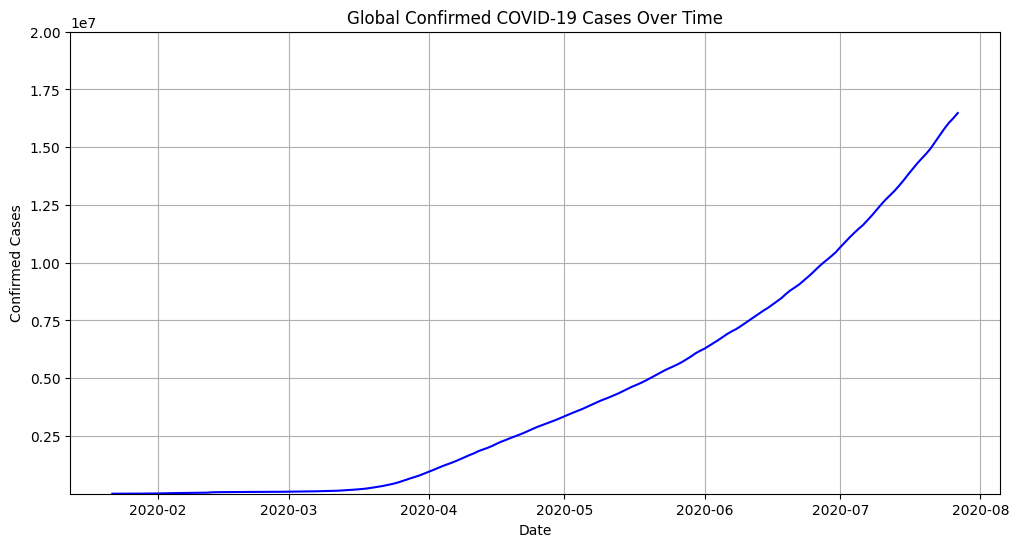

In [27]:
# put your answer here
import pandas as pd
import matplotlib.pyplot as plt



df['Date'] = pd.to_datetime(df['Date'])

global_cases = (
    df.groupby('Date')['Confirmed']
    .sum()
    .reset_index()
)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(global_cases['Date'], global_cases['Confirmed'], color='blue')

plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.ylim(1, 20000000)

plt.grid(True)


plt.show()


In [49]:
global_cases['Confirmed'].max()

16480485

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

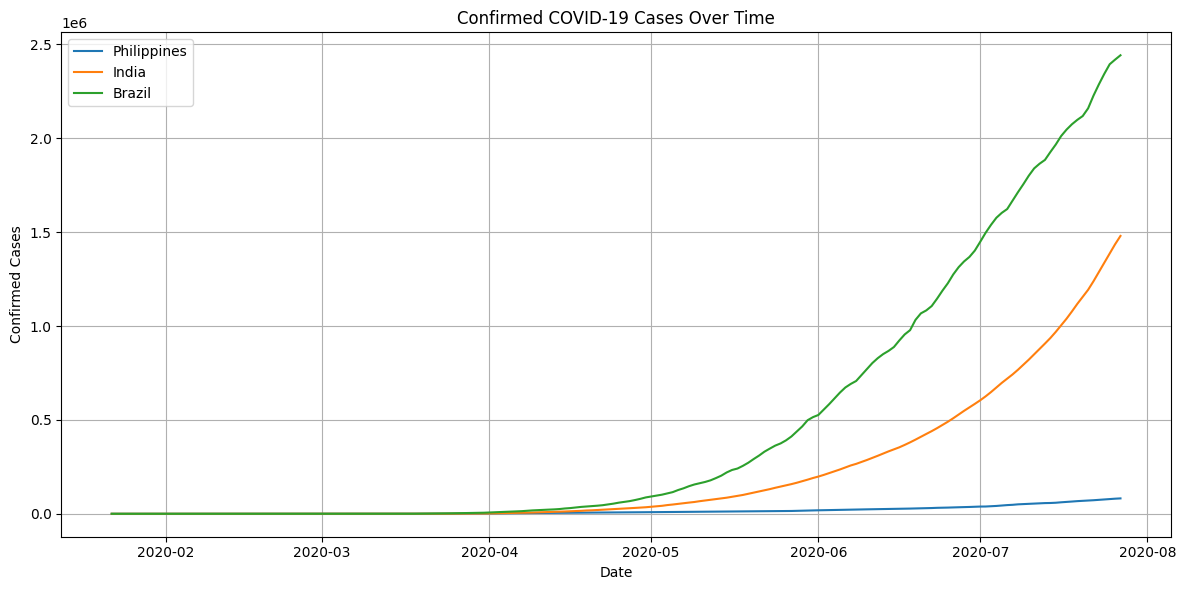

In [36]:
# put your answer here


countries = ['Philippines', 'India', 'Brazil']


df_countries = df[df['Country/Region'].isin(countries)]

# Aggregate confirmed cases by Date and Country
country_cases = (
    df_countries
    .groupby(['Date', 'Country/Region'])['Confirmed']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))

for country in countries:
    data = country_cases[country_cases['Country/Region'] == country]
    plt.plot(data['Date'], data['Confirmed'], label=country)

plt.title('Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

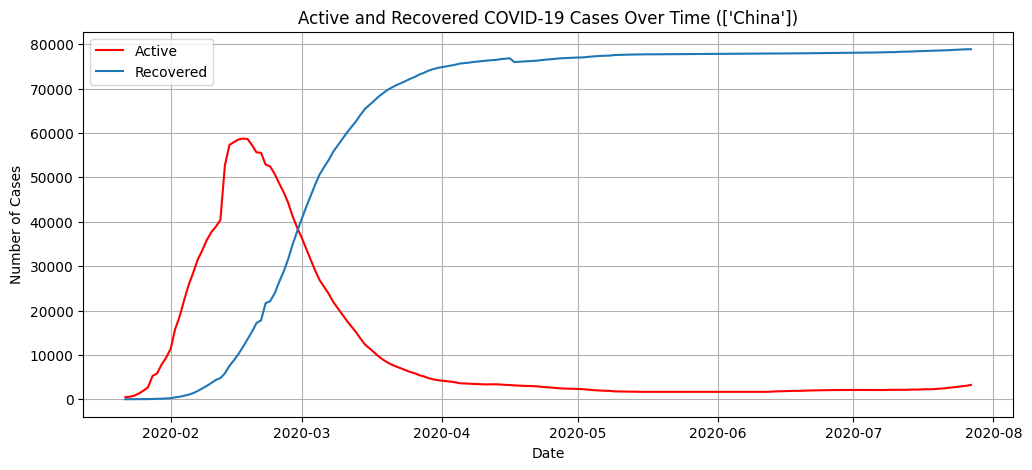

In [47]:
# put your answer here

selected_country = ['China']


country_cases2 = (
    df[df['Country/Region'].isin(selected_country)]
    .groupby('Date')[['Active', 'Recovered']]
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 5))


plt.plot(country_cases2['Date'], country_cases2['Active'], label='Active', color='red')
plt.plot(country_cases2['Date'], country_cases2['Recovered'], label='Recovered')

plt.title(f'Active and Recovered COVID-19 Cases Over Time ({selected_country})')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)


plt.show()


## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

In [50]:
# put your answer here
max_row = global_cases.loc[global_cases['Confirmed'].idxmax()]

# Extract the date
max_date = max_row['Date']

print(max_date)

2020-07-27 00:00:00


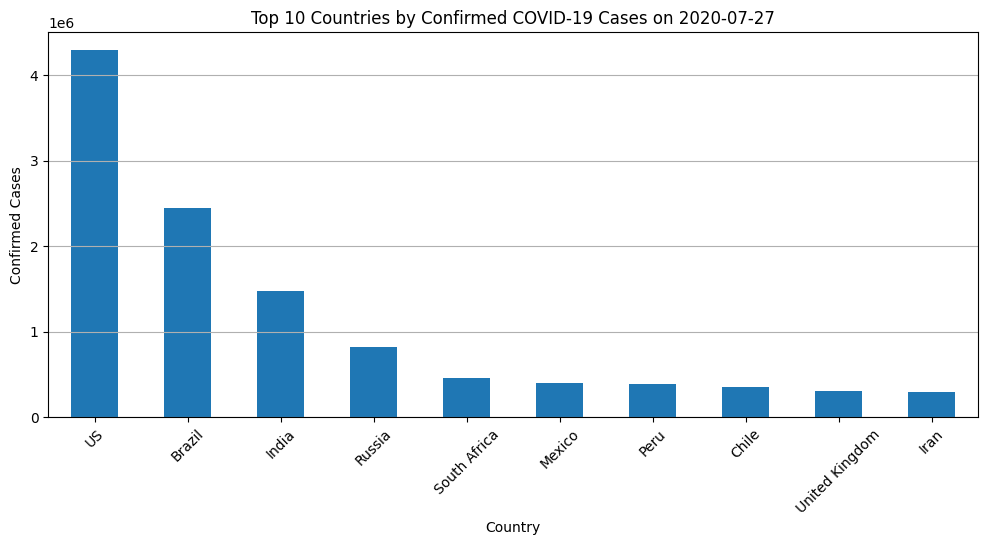

In [52]:


selected_date = max_date

date_data = df[df['Date'] == selected_date]

# Aggregate confirmed cases by country
country_confirmed = (
    date_data
    .groupby('Country/Region')['Confirmed']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot bar chart
plt.figure(figsize=(12, 5))
country_confirmed.plot(kind='bar')

plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {selected_date.date()}')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()


5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

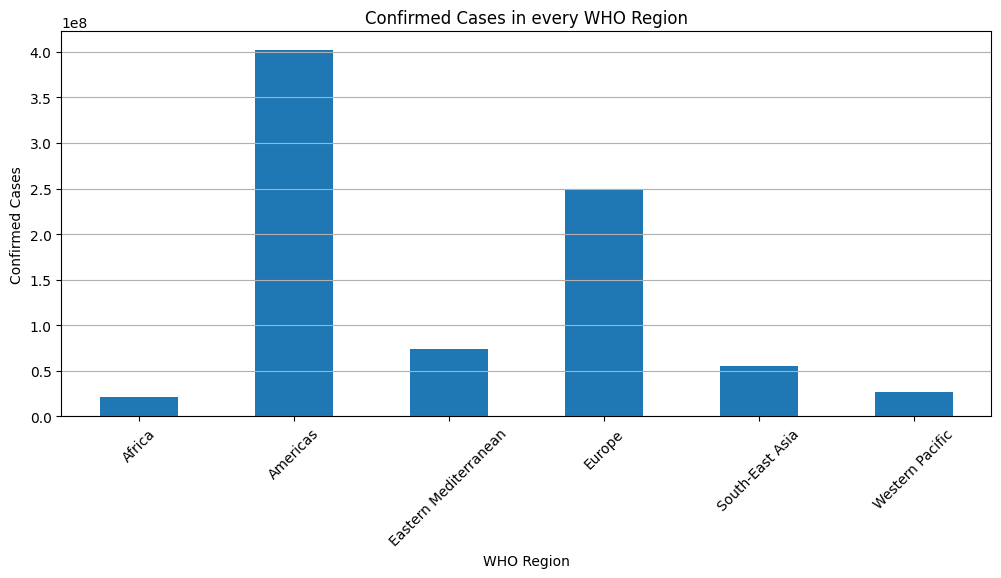

In [55]:
# put your answer here



# Aggregate confirmed cases by country
country_confirmed = (
    df
    .groupby('WHO Region')['Confirmed']
    .sum()
)

# Plot bar chart
plt.figure(figsize=(12, 5))
country_confirmed.plot(kind='bar')

plt.title(f'Confirmed Cases in every WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()


## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [64]:

# The import
import plotly.express as px

import plotly.express as px


selected_date = max_date


date_data = df[df['Date'] == selected_date]


country_confirmed = (
    date_data
    .groupby('Country/Region')['Confirmed']
    .sum()
    .reset_index()
)

# Create choropleth map
fig = px.choropleth(
    country_confirmed,
    locations='Country/Region',
    locationmode='country names',
    color='Confirmed',
    projection="natural earth",
    title=f'Confirmed COVID-19 Cases on {selected_date.date()}'
)

fig.show()


7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [62]:
# put your answer here
import pandas as pd
import plotly.express as px

df["Date"] = pd.to_datetime(df["Date"])

# Select the date to visualize
target_who = "Americas"
df_who = df[df["WHO Region"] == target_who]

# Aggregate by country in case of multiple rows per country
agg = df_who.groupby("Country/Region", as_index=False)["Confirmed"].sum()

# Create choropleth
fig = px.choropleth(
    agg,
    locations="Country/Region",       # Use country names
    locationmode="country names",     # Map by country name
    color="Confirmed",                # Color by confirmed cases
    hover_name="Country/Region",      # Show country on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title=f"Confirmed COVID-19 Cases on {target_who}"
)

fig.show()